# Kaggle House Price: Advance Regression Techniques
"Fool will ignore the data. Wise will not beleive in anything without a data".
For any company it's important to know their data and story behind it. Company who ignore data are deaf, dumb and blind. To successed in this 21st century. It is important to play with data and try to find out what data is speaking to us.
In this project I tried my best to analyse the given data. IN the following section I will briefly explain what I did in this projet.
1. UNDERSTANDING THE PROBLEMS : We will go through each variables and try to figure out the importance of those variables.
2. UNIVARIABLE STUDY: Mostly we will focuse on dependent variable, which in this case is Sale Price.
3. MULTIVARIABLE STUDY: We will study independent variables and their impact on dependent variables.
4. BASIC CLEANING : Cleaning our data. Converting categorical data into numerical data.
5. TEST ASSUMPTION: We will check if our data meet the requirements of multivariable technique.
6. LOG SCALE : We will use log scale to transform our data.
7. ONE HOT ENCODING: We will apply one hot encoding to change categorical features into numerical features.
8. APPLY ML ALOGRITHM: We will apply good ML algorithm to predict Sale Price.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('train_house.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## From below we can see the full information of data. 

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
missing_data = (df_train.isnull().sum()/ len(df_train)) *100
missing_data.sort_values(ascending = False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
                   ...    
CentralAir        0.000000
SaleCondition     0.000000
Heating           0.000000
TotalBsmtSF       0.000000
Id                0.000000
Length: 81, dtype: float64

## Below information shows missing values in our data. For e.g: PoolQC has almost 99% data are missing

In [7]:
missing_data = missing_data[missing_data > 0]
missing_data.sort_values(ascending = False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

## We can see same infromation in below heatmap as well.

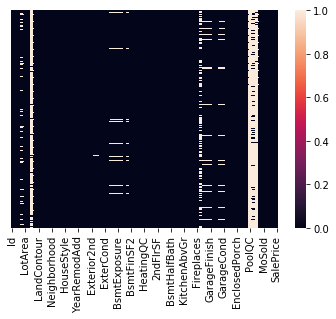

In [8]:
sns.heatmap(df_train.isnull(), yticklabels = False)

## Visualizing how is our traget variables is distributed, in this case SalesPrice. Distribution of sales price is not normal, because it is skewed to the right. As we can see in the below graph

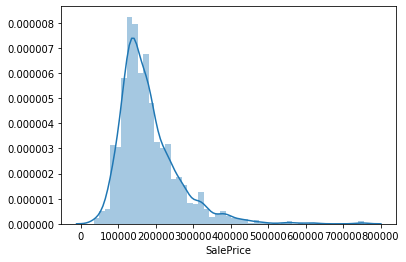

In [107]:
sns.distplot(df_train['SalePrice'])

Now time to use log scale to transform the target variable, in this case sale price. Because Machine learning algorithm works will with data which are normally distributed

In [108]:
target_data = np.log(df_train['SalePrice'])

### Now check the sales price distribution again.
From the below graph we can say our data is more normally distributed then before applying log scale.

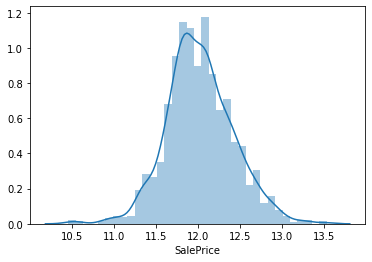

In [109]:
sns.distplot(target_data)

## Checking the features of data set

In [9]:
# checking the features of data set
numerical_data = df_train.select_dtypes(include = [np.number])
categorical_data = df_train.select_dtypes(exclude = [np.number])
print('There are {0} numerical and {1} categorical features in the training data'.format(numerical_data.shape[1], 
                                                                                          categorical_data.shape[1]))

There are 38 numerical and 43 categorical features in the training data


## Checking correlation for the numerical data.

In [10]:
corr = numerical_data.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


### From the below bar graph we can assume that property are mostly sold during summer time(June & July) in every year.

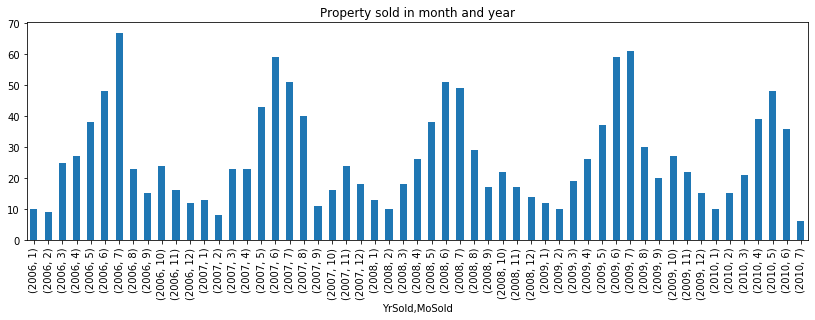

In [11]:
df_train.groupby(['YrSold','MoSold']).Id.count().plot(kind = 'bar', figsize = (14, 4))
plt.title('Property sold in month and year')
plt.show()

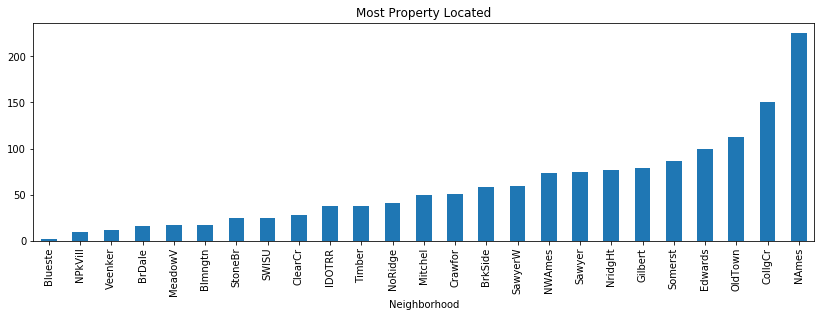

In [12]:
df_train.groupby(['Neighborhood']).Id.count().sort_values().plot(kind = 'bar', figsize = (14, 4))
plt.title('Most Property Located')
plt.show()

###  Distribution of numerical features

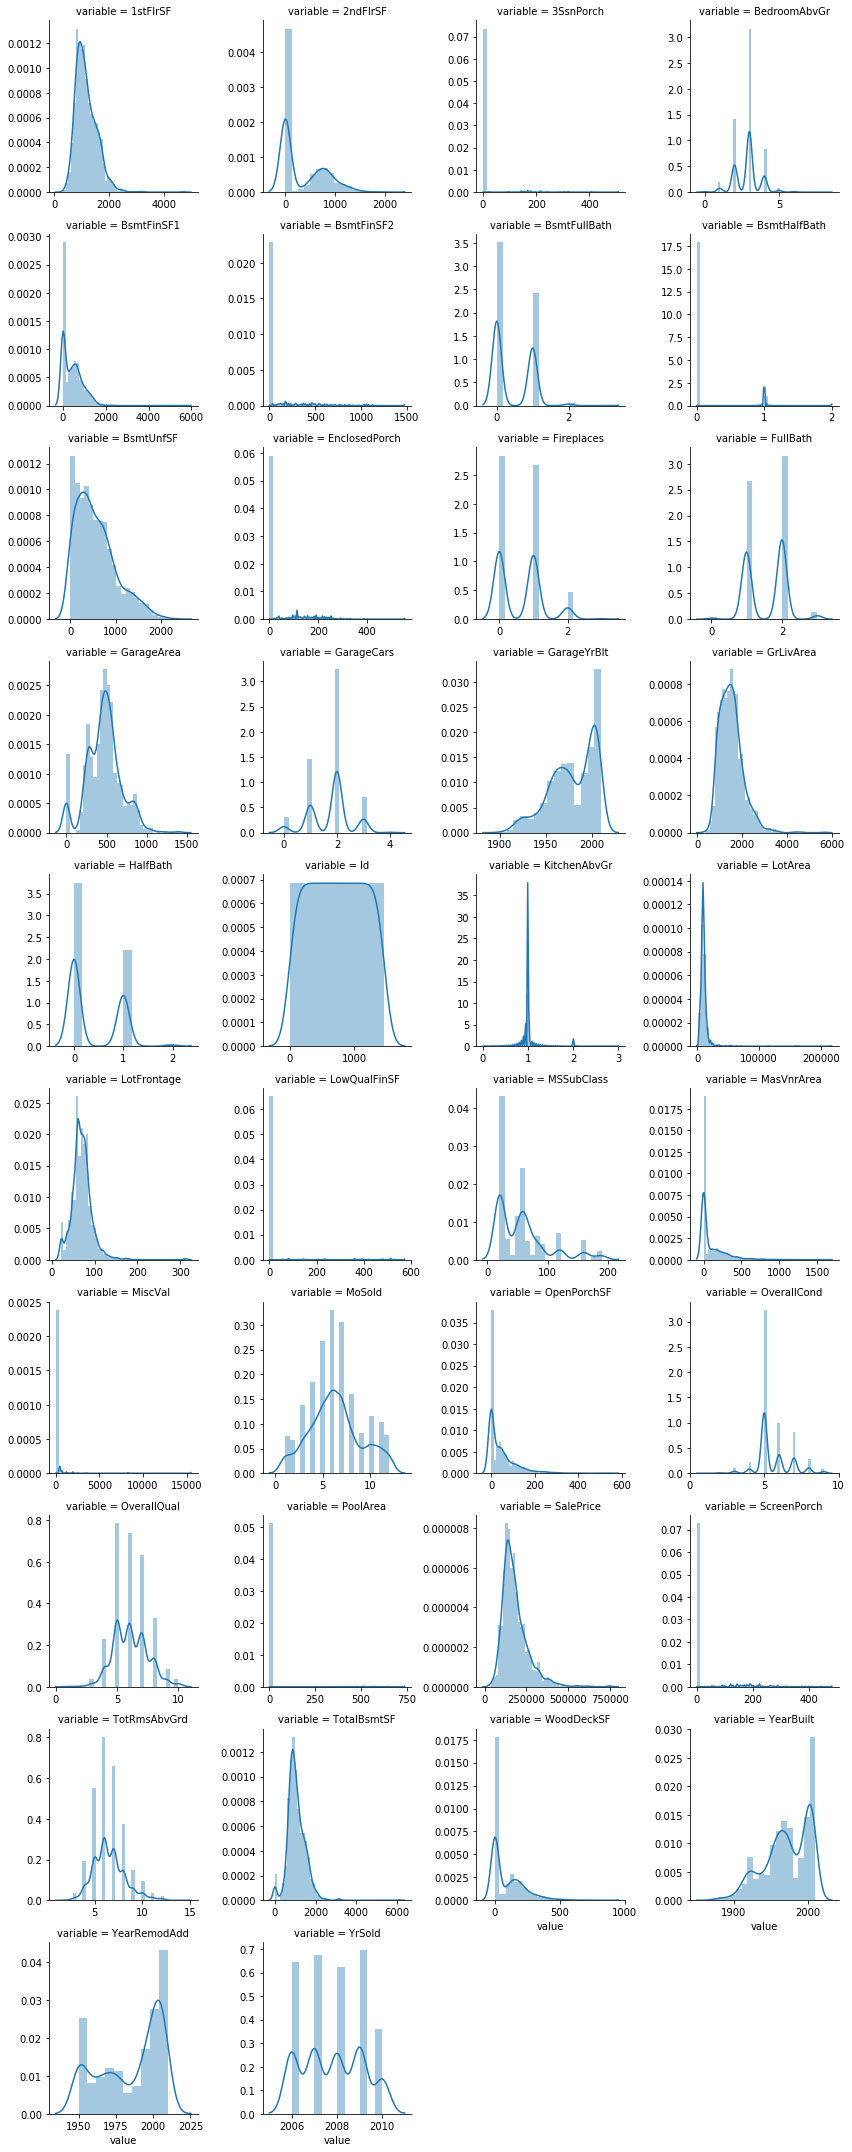

In [13]:

f = pd.melt(df_train, value_vars=sorted(numerical_data))
g = sns.FacetGrid(f, col = 'variable', col_wrap=4, sharex= False, sharey= False)
g = g.map(sns.distplot, 'value')

## # Distribution of categorical features

C:\Users\Kiran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


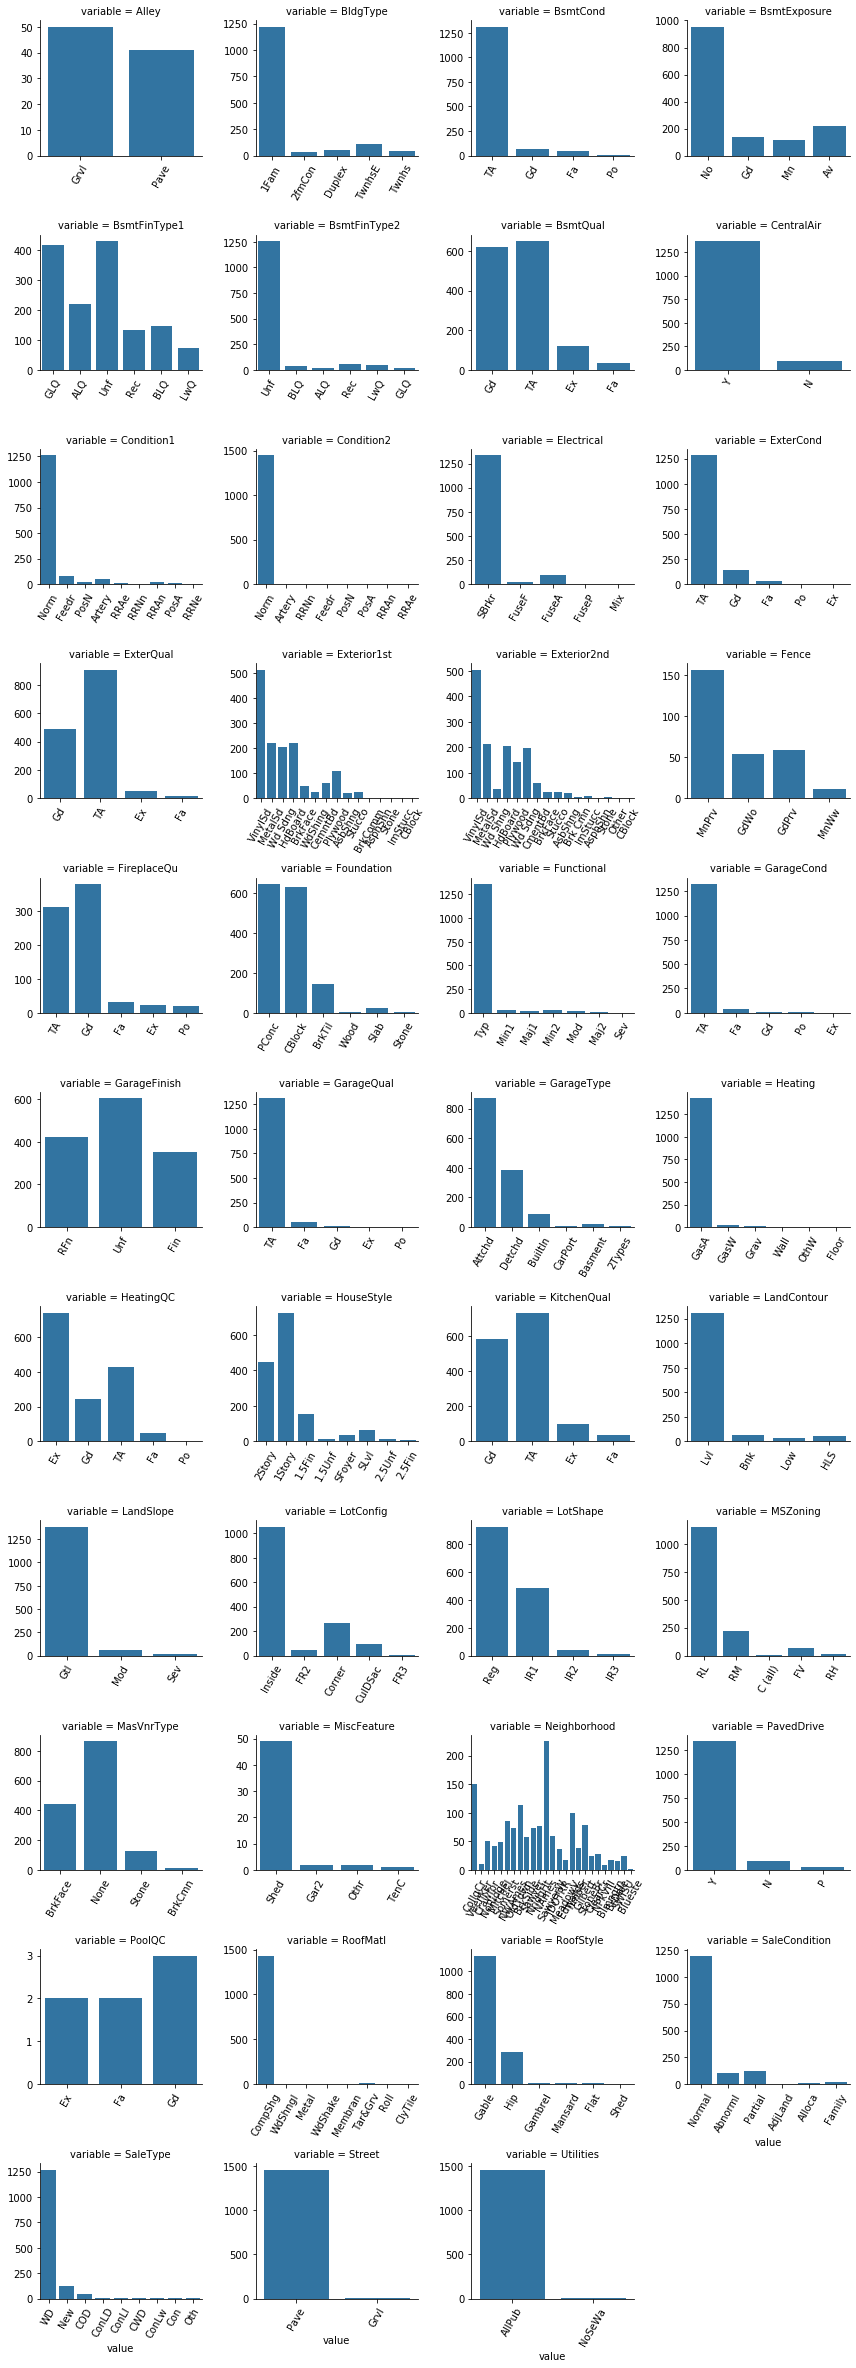

In [14]:
f = pd.melt(df_train, value_vars=sorted(categorical_data))
g = sns.FacetGrid(f, col = 'variable', col_wrap=4, sharex= False, sharey= False)
plt.xticks(rotation = 'vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(),rotation = 60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

## Converting categorical features into numerical features

In [15]:
# converting categorical features into numerical features
'''Alley, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, ExterCond, ExterQual, FireplaceQu, Functional,
GarageCond, GarageFinish, GarageQual, HeatingQc, KitchenQual, LandContour, LandSlope, LotShape, PavedDrive, PoolQC, Utilities'''

'Alley, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, ExterCond, ExterQual, FireplaceQu, Functional,\nGarageCond, GarageFinish, GarageQual, HeatingQc, KitchenQual, LandContour, LandSlope, LotShape, PavedDrive, PoolQC, Utilities'

In [16]:
# Alley
df_train.Alley.replace({'Grvl': 1, 'Pave': 2}, inplace =  True)
# Basment Condition
df_train.BsmtCond.replace({'Po': 1, 'Fa': 2, 'TA': 3,  'Gd': 4, 'Ex': 5}, inplace =  True)
# Basment Exposure
df_train.BsmtExposure.replace({'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}, inplace =  True)
# Basment Quality
df_train.BsmtQual.replace({'Po': 1, 'Fa': 2, 'TA': 3,  'Gd': 4, 'Ex': 5}, inplace =  True)
# Lot Shape
df_train.LotShape.replace({'Reg': 1, 'IR1': 2, 'IR2': 3,  'IR3': 4}, inplace =  True)
# Finished Basment 1 Rating
df_train.BsmtFinType1.replace({'Unf': 1, 'LwQ': 2, 'Rec': 3,  'BLQ': 4, 'ALQ': 5, 'GLQ': 6}, inplace =  True)
# Finsihed Baement 2 Rating
df_train.BsmtFinType2.replace({'Unf': 1, 'LwQ': 2, 'Rec': 3,  'BLQ': 4, 'ALQ': 5, 'GLQ': 6}, inplace =  True)
# Land Contour
df_train.LandContour.replace({'Low': 1, 'HLS': 2, 'Bnk': 3,  'Lvl': 4}, inplace =  True)
# Land Slope
df_train.LandSlope.replace({'Sev': 1, 'Mod': 2, 'Gtl': 3}, inplace =  True)
# Exterior Quality
df_train.ExterQual.replace({'Po': 1, 'Fa': 2, 'TA': 3,  'Gd': 4, 'Ex': 5}, inplace =  True)
# Exterior Condition
df_train.ExterCond.replace({'Po': 1, 'Fa': 2, 'TA': 3,  'Gd': 4, 'Ex': 5}, inplace =  True)
# Heating Quality and condition
df_train.HeatingQC.replace({'Po': 1, 'Fa': 2, 'TA': 3,  'Gd': 4, 'Ex': 5}, inplace =  True)
# Fire Place Quality
df_train.FireplaceQu.replace({'Po': 1, 'Fa': 2, 'TA': 3,  'Gd': 4, 'Ex': 5}, inplace =  True)
# Home Functionality
df_train.Functional.replace({'Sal': 1, 'Sev': 2, 'Maj2': 3,  'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8}, inplace =  True)
# Garage Finsihed
df_train.GarageFinish.replace({'Unf': 1, 'RFn': 2, 'Fin': 3}, inplace =  True)
# Garage Quality
df_train.GarageQual.replace({'Po': 1, 'Fa': 2, 'TA': 3,  'Gd': 4, 'Ex': 5}, inplace =  True)
# Garage Condition
df_train.GarageCond.replace({'Po': 1, 'Fa': 2, 'TA': 3,  'Gd': 4, 'Ex': 5}, inplace =  True)
# Paved Driveway
df_train.PavedDrive.replace({'N': 1, 'P': 2, 'Y': 3}, inplace =  True)
# Pool Quality
df_train.PoolQC.replace({'Fa': 2, 'TA': 3,  'Gd': 4, 'Ex': 5}, inplace =  True)
# Kitchen Quality
df_train.KitchenQual.replace({'Po': 1, 'Fa': 2, 'TA': 3,  'Gd': 4, 'Ex': 5}, inplace =  True)
# Utilities
df_train.Utilities.replace({'ELO': 1, 'NoSeWa': 2, 'NoSewr': 3,  'AllPub': 4}, inplace =  True)

## Filling all the missing values.

In [18]:
df_train['LotFrontage']= df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())

In [20]:
df_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [23]:
df_train['BsmtCond']=df_train['BsmtCond'].fillna(df_train['BsmtCond'].mode())
df_train['BsmtQual']=df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode())

In [29]:
df_train['FireplaceQu']=df_train['FireplaceQu'].fillna(df_train['FireplaceQu'].mode())
df_train['GarageType']=df_train['GarageType'].fillna(df_train['GarageType'].mode()[0])

In [35]:
df_train['GarageFinish']=df_train['GarageFinish'].fillna(df_train['GarageFinish'].mean())
df_train['GarageQual']=df_train['GarageQual'].fillna(df_train['GarageQual'].mean())
df_train['GarageCond']=df_train['GarageCond'].fillna(df_train['GarageCond'].mean())

In [38]:
df_train['MasVnrType']=df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0])
df_train['MasVnrArea']=df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mean())

In [50]:
df_train['BsmtExposure']=df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].mode()[0])
df_train['BsmtFinType1']=df_train['BsmtFinType1'].fillna(df_train['BsmtFinType1'].mode()[0])
df_train['BsmtFinType2']=df_train['BsmtFinType2'].fillna(df_train['BsmtFinType2'].mode()[0])
df_train['Electrical']= df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

In [51]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null float64
LotShape         1460 non-null int64
LandContour      1460 non-null int64
Utilities        1460 non-null int64
LotConfig        1460 non-null object
LandSlope        1460 non-null int64
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null

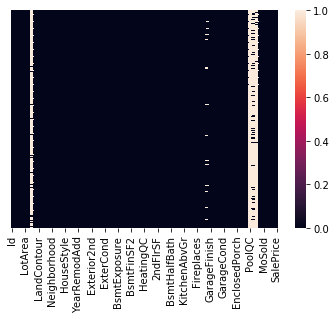

In [52]:
sns.heatmap(df_train.isnull(), yticklabels = False)

## Dropping all unnecassary columns.

In [54]:
df_train.drop(['PoolQC','Fence','MiscFeature', 'Alley', 'GarageYrBlt'],axis=1,inplace=True)

### From the below hitmap we can see we dont have any missing value in our data.

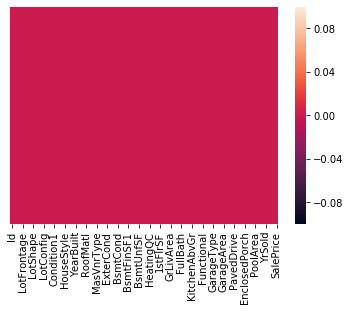

In [55]:
sns.heatmap(df_train.isnull(), yticklabels = False)

In [56]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,1,4,4,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,1,4,4,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,2,4,4,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,2,4,4,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,2,4,4,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [57]:
numerical_data = df_train.select_dtypes(include = [np.number])
categorical_data = df_train.select_dtypes(exclude = [np.number])
print('There are {0} numerical and {1} categorical features in the training data'.format(numerical_data.shape[1], 
                                                                                          categorical_data.shape[1]))

There are 56 numerical and 20 categorical features in the training data


In [65]:
columns = categorical_data.columns
columns

Index(['MSZoning', 'Street', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
       'CentralAir', 'Electrical', 'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

In [66]:
df_train.shape

(1460, 76)

## Calling test data.

In [91]:
df_test = pd.read_csv('formulatedtest.csv')

In [92]:
df_test.shape

(1459, 75)

### Concatenating test data and training data.

In [93]:
df_final = pd.concat([df_train, df_test], axis = 0)

C:\Users\Kiran\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [94]:
df_final.shape

(2919, 232)

In [95]:
numerical_data = df_final.select_dtypes(include = [np.number])
categorical_data = df_final.select_dtypes(exclude = [np.number])
print('There are {0} numerical and {1} categorical features in the training data'.format(numerical_data.shape[1], 
                                                                                          categorical_data.shape[1]))

There are 212 numerical and 20 categorical features in the training data


## Doing one hot encodaing for categorical datas.

In [96]:
model_data = pd.get_dummies(df_final).copy()
model_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave
0,856,854,0,3,1.0,0.0,0.0,0.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1,1262,0,0,3,1.0,0.0,0.0,0.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,920,866,0,3,1.0,0.0,0.0,0.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
3,961,756,0,3,1.0,0.0,0.0,0.0,0.0,4.0,...,0,0,0,0,0,0,0,0,0,0
4,1145,1053,0,4,1.0,0.0,0.0,0.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0


## Removing all the duplicates

In [97]:
model_data =model_data.loc[:,~model_data.columns.duplicated()]

In [98]:
model_data.shape

(2919, 212)

### Dividing test data and train data.

In [99]:
df_train = model_data.iloc[:1460, :]
df_test = model_data.iloc[1460: , :]

### Dropping sale price from test data coz all the sale price on test data has nan value.

In [100]:
df_test.drop(['SalePrice'], axis = 1, inplace= True)

C:\Users\Kiran\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [101]:
X_train = df_train.drop(['SalePrice'], axis = 1)
y_train = df_train['SalePrice']

## Importing machine learning algorithm to predict sale price. For this specific problems I am using xgboost.

In [102]:
import xgboost 
classifier = xgboost.XGBRFRegressor()
classifier.fit(X_train, y_train)

C:\Users\Kiran\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Kiran\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[14:49:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRFRegressor(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
               colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
               max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
               n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=0.8, verbosity=1)

In [103]:
y_pred = classifier.predict(df_test)

In [104]:
y_pred

array([121984.266, 136793.48 , 159577.17 , ..., 138183.73 , 124106.63 ,
       221195.3  ], dtype=float32)

## Creating data frame for predicated value and submitting in Kaggle.

In [106]:
pred = pd.DataFrame(y_pred)
df_sub = pd.read_csv('sample_submission.csv')
datasets = pd.concat([df_sub['Id'], pred], axis = 1)
datasets.columns = ['Id', 'SalePrice']
datasets.to_csv('submitted2', index = False)